
# 6.3 Second Order ODE
En general es una ecuacion de la forma 

$ \dfrac{d^2 x}{dt^2} = f(x, \dfrac{dx}{dt} , t)$ <br>

El truco es que vamos a definir $y = \dfrac{dx}{dt}$ <br>
Y entonces la ecuacion por resolver es $\dfrac{dy}{dt} = f(x,y,t)$ <br>

And we can do a similar trick for higher order equations. <br>
And now we solve if using runge kutta as a system of equations. <br> 

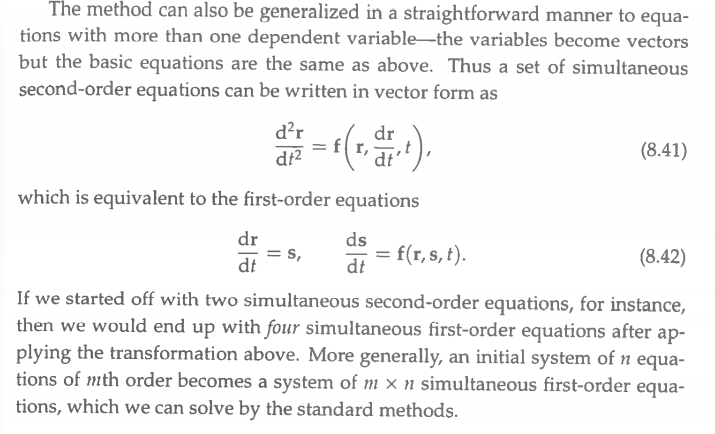


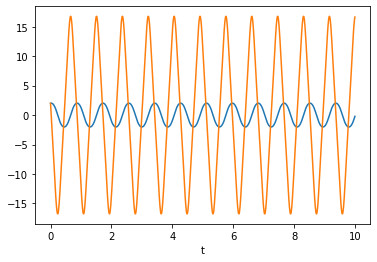

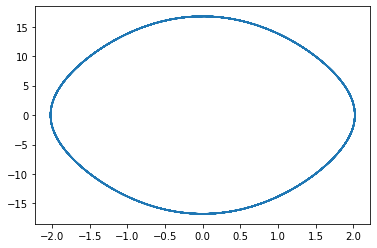

In [1]:
# Pendulum equation
# We solve d th / dt^2 = -g/l sin th
import numpy as np
from matplotlib import pyplot as plt

# we define w = dt th / dt 
# and the other equation is dw / dt = -g/l sin th
#this is our new system of equations

g = 9.81
l = 0.1

def f(r,t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*np.sin(theta)
    return(np.array([ftheta,fomega],float))

a = 0.0
b = 10.0
N = 1000
h = (b-a)/N


tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []

#initial values
r = np.array([2,2],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
plt.plot(tpoints,xpoints)
plt.plot(tpoints,ypoints)
plt.xlabel("t")
plt.show()
plt.plot(xpoints,ypoints)


plt.show()

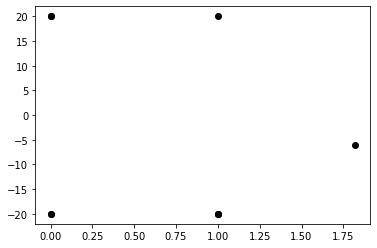

None

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from time import sleep
from IPython import display
#magia de Matplotlib para que la grafica se actualice dinamicamente
%matplotlib inline



plt.figure()


for i in range(int(N/100)):
    plt.plot([-20,20],'ko')
    plt.plot([-20,-20],'ko')
    plt.plot([20,-20],'ko')
    plt.plot([20,-20],'ko')
    plt.plot(xpoints[i],ypoints[i],'ko')

    
    display.clear_output(wait=True)

    display.display(plt.show())
    sleep(0.001)


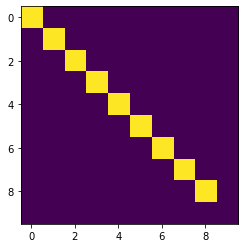

In [5]:
# Ejemplo de animacion

%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output
from time import sleep

n = 10
a = np.zeros((n, n))
plt.figure()

for i in range(n):
    plt.imshow(a)
    plt.show()
    a[i, i] = 1
    sleep(0.1)
    clear_output(wait=True)

In [6]:
### Throw
# encontrar la velocidad inicial mejor para tener un mejor lanzamiento


from numpy import array,arange

g = 9.81         # Acceleration due to gravity
a = 0.0          # Initial time
b = 10.0         # Final time
N = 1000         # Number of Runge-Kutta steps
h = (b-a)/N      # Size of Runge-Kutta steps
target = 1e-10   # Target accuracy for binary search

# Function for Runge-Kutta calculation
def f(r):
    x = r[0]
    y = r[1]
    fx = y
    fy = -g
    return array([fx,fy],float)

# Function to solve the equation and calculate the final height
def height(v):
    r = array([0.0,v],float)
    for t in arange(a,b,h):
        k1 = h*f(r)
        k2 = h*f(r+0.5*k1)
        k3 = h*f(r+0.5*k2)
        k4 = h*f(r+k3)
        r += (k1+2*k2+2*k3+k4)/6
    return r[0]

# Main program performs a binary search
v1 = 0.01
v2 = 1000.0
h1 = height(v1)
h2 = height(v2)

while abs(h2-h1)>target:
    vp = (v1+v2)/2
    hp = height(vp)
    if h1*hp>0:
        v1 = vp
        h1 = hp
    else:
        v2 = vp
        h2 = hp

v = (v1+v2)/2
print("The required initial velocity is",v,"m/s")

The required initial velocity is 49.04999999999815 m/s


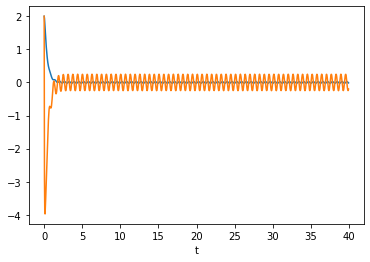

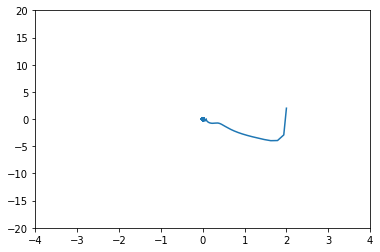

In [7]:
# Pendulo forzado
# We solve d th / dt^2 = -g/l sin th + cos(w*t)
import numpy as np
from matplotlib import pyplot as plt

# we define w = dt th / dt 
# and the other equation is dw / dt = -g/l sin th + cos(w*t)
#this is our new system of equations

w= 10
g = 9.81
l = 0.1
b=0.01

def f(r,t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*theta+-b*omega+10*np.cos(w*t)
    return(np.array([ftheta,fomega],float))

a = 0.0
b = 40.0
N = 1000
h = (b-a)/N


tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []

#initial values
r = np.array([2,2],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
plt.plot(tpoints,xpoints)
plt.plot(tpoints,ypoints)
plt.xlabel("t")
plt.show()
plt.plot(xpoints,ypoints)
plt.xlim(-4,4)
plt.ylim(-20,20)



plt.show()